In [1]:
# 主要包
import numpy as np
import pandas as pd
import datetime
import random

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt


# 集成学习中的stacking
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
# skew度量倾斜度(偏度)(三阶中心距),和正态化
from scipy.stats import skew, norm
# scipy中的方法
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# 混杂的
# 网格搜索最优模型
from sklearn.model_selection import GridSearchCV
# 交叉验证,交叉验证的评估分数
from sklearn.model_selection import KFold, cross_val_score
# mse
from sklearn.metrics import mean_squared_error
# 将分类整数特征编码为即“one-of-K”或“dummy”
from sklearn.preprocessing import OneHotEncoder
# 它还可以用于将非数字标签(只要它们是可耐洗和可比较的)转换为数字标签。
from sklearn.preprocessing import LabelEncoder
# 生成管道
from sklearn.pipeline import make_pipeline
# StandardScaler和scale的区别是使用StandardScaler会保留测试集合均值和标准差同样在测试集上进行标准化
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# 使用对异常值具有鲁棒性的统计数据来缩放特性。
from sklearn.preprocessing import RobustScaler
# 降维
from sklearn.decomposition import PCA
import matplotlib as mpl

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_columns', None)

# 忽略浸膏
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
import os

In [2]:
# 加载数据集
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train.shape, test.shape

((200000, 202), (200000, 201))

In [3]:
# train1 = train.iloc[:2000,:]
# test1 = test.iloc[:2000,:]
train1 = train.copy()
test1 = test.copy()
train1.shape, test1.shape

((200000, 202), (200000, 201))

In [4]:
train1.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [5]:
# 分割特征和标签
# 设置SalePrice为标签
train_labels = train1['target'].reset_index(drop=True)

# 移除SalePrice后的剩余属性设置为特征
train_features = train1.drop(['target'], axis=1)
test_features = test1
# 结合训练和测试的特征，以便将整个数据集在管道中应用
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(400000, 201)

In [6]:
# 确定缺失值的阈值
def percent_missing(df):
    # 将传入的数据进行转化为DataFrame对象
    data = pd.DataFrame(df)
    # 将每一列的列名装在列表里
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        # round 可以进行四舍五入，这里我们对每一列的空值进行均值化，算出百分比
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('数据丢失的百分比')
df_miss[0:10]

数据丢失的百分比


[('ID_code', 0.0),
 ('var_0', 0.0),
 ('var_1', 0.0),
 ('var_2', 0.0),
 ('var_3', 0.0),
 ('var_4', 0.0),
 ('var_5', 0.0),
 ('var_6', 0.0),
 ('var_7', 0.0),
 ('var_8', 0.0)]

# 并无数据缺失现象

In [7]:
# train_features = train_features['ID_code'].resetdd_index(drop=True)
train_features = train_features.drop(['ID_code'], axis=1)

In [8]:
test_features = test_features.drop(['ID_code'],axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
#标准化
ss = MinMaxScaler()#分类模型，经常使用的是minmaxscaler归一化，回归模型经常用standardscaler
xx_train = ss.fit_transform(train_features, train_labels)
xx_test = ss.transform(test_features)
xx_train.shape

(200000, 200)

In [10]:
# 查看归一化后的数据
xx_train = pd.DataFrame(xx_train)
xx_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.515985,0.527761,0.498848,0.516818,0.517698,0.551997,0.501877,0.501123,0.522330,0.500931,0.536163,0.527899,0.483136,0.513056,0.468552,0.536975,0.502334,0.528249,0.494316,0.522030,0.509915,0.462462,0.483403,0.493736,0.431122,0.489763,0.505733,0.534426,0.514106,0.548852,0.537378,0.457673,0.537191,0.473129,0.465974,0.535088,0.460251,0.540522,0.469551,0.509196,0.534277,0.513974,0.512592,0.476419,0.427950,0.509088,0.503805,0.515045,0.493846,0.502872,0.477621,0.510900,0.530692,0.545097,0.504340,0.5

In [11]:
from collections import Counter
Counter(train_labels.values)

Counter({0: 179902, 1: 20098})

In [12]:
#降维
pca = PCA(n_components=2)
xx_train = pca.fit_transform(xx_train)
print(pca.explained_variance_ratio_)

[0.00733805 0.0066784 ]


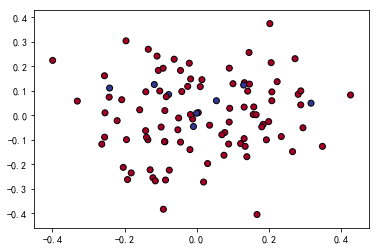

In [13]:
plt.scatter(xx_train[:100, 0], xx_train[:100, 1], c=train_labels[:100], cmap=plt.cm.RdYlBu,
               edgecolors='k',label="训练集")
plt.show()
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_test, cmap=cm_bright, alpha=0.5,
#                edgecolors='k',label="测试集")

In [13]:
from sklearn.model_selection import train_test_split
#数据分割
x_train,x_test,y_train,y_test = train_test_split(xx_train, train_labels, test_size=0.2, random_state=0)

x_train.shape

(160000, 200)

In [11]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB #引入多项式和伯努利的贝叶斯
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn import metrics

In [16]:
###  基准模型方法
def benchmark(clf,name):
    print (u'分类器：', clf)
    
    ##  设置最优参数，并使用5折交叉验证获取最优参数值
    alpha_can = np.logspace(-2, 1, 10)
    model = GridSearchCV(clf, param_grid={'alpha': alpha_can}, cv=5)
    m = alpha_can.size
    
    ## 如果模型有一个参数是alpha，进行设置
    if hasattr(clf, 'alpha'):
        model.set_params(param_grid={'alpha': alpha_can})
        m = alpha_can.size
    ## 如果模型有一个k近邻的参数，进行设置
    if hasattr(clf, 'n_neighbors'):
        neighbors_can = np.arange(1, 15)
        model.set_params(param_grid={'n_neighbors': neighbors_can})
        m = neighbors_can.size
    ## LinearSVC最优参数配置
    if hasattr(clf, 'C'):
        C_can = np.logspace(1, 3, 3)
        model.set_params(param_grid={'C':C_can})
        m = C_can.size
    ## SVM最优参数设置
    if hasattr(clf, 'C') & hasattr(clf, 'gamma'):
        C_can = np.logspace(1, 3, 3)
        gamma_can = np.logspace(-3, 0, 3)
        model.set_params(param_grid={'C':C_can, 'gamma':gamma_can})
        m = C_can.size * gamma_can.size
    ## 设置深度相关参数，决策树
    if hasattr(clf, 'max_depth'):
        max_depth_can = np.arange(4, 10)
        model.set_params(param_grid={'max_depth': max_depth_can})
        m = max_depth_can.size
    
    ## 模型训练
    t_start = time()
    model.fit(x_train, y_train)
    t_end = time()
    t_train = (t_end - t_start) / (5*m)
    print (u'5折交叉验证的训练时间为：%.3f秒/(5*%d)=%.3f秒' % ((t_end - t_start), m, t_train))
    print (u'最优超参数为：', model.best_params_)
    
    ## 模型预测
    t_start = time()
    y_hat = model.predict(x_test)
    t_end = time()
    t_test = t_end - t_start
    print (u'测试时间：%.3f秒' % t_test)
    
    ## 模型效果评估
    train_acc = metrics.accuracy_score(y_train, model.predict(x_train))
    test_acc = metrics.accuracy_score(y_test, y_hat)
    print (u'训练集准确率：%.2f%%' % (100 * train_acc))
    print (u'测试集准确率：%.2f%%' % (100 * test_acc))
    
    ## 返回结果(训练时间耗时，预测数据耗时，训练数据错误率，测试数据错误率, 名称)
    return t_train, t_test, 1-train_acc, 1-test_acc, name

In [12]:
### 使用不同的分类器对数据进行比较
print (u'分类器的比较：\n')
clfs = [
    [RidgeClassifier(), 'Ridge'],
    [BernoulliNB(), 'BernoulliNB'],
#     [SVC(), 'SVM'],
    [LinearSVC(loss='squared_hinge', penalty='l1', dual=False, tol=1e-4), 'LinearSVC-l1'],
    [LinearSVC(loss='squared_hinge', penalty='l2', dual=False, tol=1e-4), 'LinearSVC-l2'],
    [KNeighborsClassifier(), 'KNN'],
    [RandomForestClassifier(n_estimators=200), 'RandomForest']
]

分类器的比较：



In [17]:
## 将训练数据保存到一个列表中
result = []
for clf,name in clfs:
    # 计算算法结果
    a = benchmark(clf,name)
    # 追加到一个列表中，方便进行展示操作
    result.append(a)
    print ('\n')
## 将列表转换为数组
result = np.array(result)

分类器的比较：

分类器： RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
5折交叉验证的训练时间为：2.192秒/(5*10)=0.044秒
最优超参数为： {'alpha': 0.01}
测试时间：0.000秒
训练集准确率：89.95%
测试集准确率：89.96%


分类器： KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
5折交叉验证的训练时间为：43.929秒/(5*14)=0.628秒
最优超参数为： {'n_neighbors': 14}
测试时间：0.204秒
训练集准确率：89.95%
测试集准确率：89.95%


分类器： BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
5折交叉验证的训练时间为：2.395秒/(5*10)=0.048秒
最优超参数为： {'alpha': 0.01}
测试时间：0.002秒
训练集准确率：89.95%
测试集准确率：89.96%


分类器： LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
5折交叉验证的训练时间为：1.300秒/(5*3)=0.087秒
最优超参数为： {'

In [18]:
### 获取需要画图的数据
result = [[x[i] for x in result] for i in range(5)]
training_time, test_time, training_err, test_err, clf_names = result

training_time = np.array(training_time).astype(np.float)
test_time = np.array(test_time).astype(np.float)
training_err = np.array(training_err).astype(np.float)
test_err = np.array(test_err).astype(np.float)

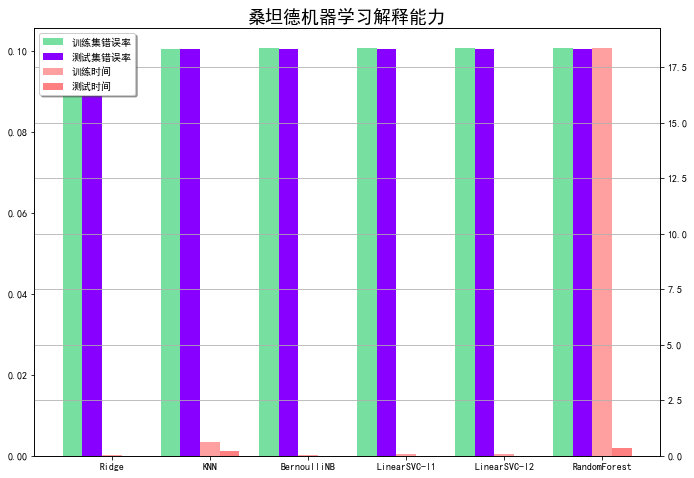

In [19]:
### 画图
x = np.arange(len(training_time))
plt.figure(figsize=(10, 7), facecolor='w')
ax = plt.axes()
b0 = ax.bar(x+0.1, training_err, width=0.2, color='#77E0A0')
b1 = ax.bar(x+0.3, test_err, width=0.2, color='#8800FF')
ax2 = ax.twinx()
b2 = ax2.bar(x+0.5, training_time, width=0.2, color='#FFA0A0')
b3 = ax2.bar(x+0.7, test_time, width=0.2, color='#FF8080')
plt.xticks(x+0.5, clf_names)
plt.legend([b0[0], b1[0], b2[0], b3[0]], (u'训练集错误率', u'测试集错误率', u'训练时间', u'测试时间'), loc='upper left', shadow=True)
plt.title(u'桑坦德机器学习解释能力', fontsize=18)
plt.xlabel(u'分类器名称')
plt.grid(True)
plt.tight_layout(2)
plt.show()

In [20]:
# train_x = train.drop(['ID_code'],axis=1)
# train_x = train_x.drop(['target'],axis=1)
# train_y = train['target'].reset_index(drop=True)
train_x=xx_train

In [21]:
train_y=train_labels

In [22]:
print("rideg_clf......")
rideg_clf = clfs[0][0].fit(train_x, train_y)
print("nb_clf......")
nb_clf = clfs[1][0].fit(train_x, train_y)
print("l1_clf......")
l1_clf = clfs[2][0].fit(train_x, train_y)
print("l2_clf......")
l2_clf = clfs[3][0].fit(train_x, train_y)
print("knn_clf......")
knn_clf = clfs[4][0].fit(train_x, train_y)
# print("rf_clf......")
# rf_clf = clfs[5][0].fit(train_x, train_y)

rideg_clf......
nb_clf......
l1_clf......
l2_clf......
knn_clf......


In [23]:
def blended_predictions(X):
    a = rideg_clf.predict(X)
    print("ridge..ok",a.shape)
#     b = knn_clf.predict(X)
#     print("knn..ok",b.shape)
    c = nb_clf.predict(X)
    print("nb..ok",c.shape)
    d = l1_clf.predict(X)
    print("l1..ok",d.shape)
    e = l2_clf.predict(X)
    print("l2..ok",e.shape)
    return ((0.3*a)+(0.3*c)+(0.1*d)+(0.3*e))

In [24]:
test_x = test.drop(['ID_code'],axis=1)
test_x = ss.transform(test_x)
test_x.shape

(200000, 200)

In [25]:
test_x = pd.DataFrame(test_x)
test_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.535360,0.897837,0.628717,0.715833,0.548256,0.605894,0.574061,0.578182,0.611866,0.674016,0.474766,0.502258,0.438561,0.224288,0.468781,0.510767,0.408172,0.272646,0.500738,0.600578,0.248951,0.488649,0.347060,0.506248,0.272898,0.723250,0.369578,0.422438,0.540640,0.478163,0.654120,0.395085,0.700669,0.401839,0.436918,0.648217,0.359617,0.361495,0.445720,0.780374,0.367258,0.789947,0.526482,0.614721,0.528090,0.382464,0.546175,0.825746,0.525779,0.506291,0.540970,0.528447,0.475126,0.813736,0.474295,0.621119,0.628672,0.519463,0.217811,0.541627,0.514066,0.595841,0.394696,0.524412,0.557168,0.569421,0.553651,0.628244,0.352166,0.598889,0.618069,0.571190,0.286160,0.691240,0.583821,0.614524,0.516169,0.282829,0.374934,0.897291,0.567416,0.599483,0.857826,0.659442,0.556377,0.519196,0.447038,0.690740,0.733314,0.698963,0.607569,0.580345,0.580056,0.408143,0.191669,0.437848,0.337834,0.650571,0.534360,0.739589,0.465785,0.607151,0.653008,0.423764,0.588344,0.429957,0.511187,0.341971,0.284615,0.354006,0.452239,0.505969,0.616953,0.727890,0.322900,0.447015,0.565736,0.329589,0.491590,0.716841,0.654827,0.464562,0.464881,0.555144,0.363901,0.462238,0.672580,0.663211,0.339046,0.499085,0.551106,0.595882,0.805201,0.730694,0.543017,0.585268,0.317316,0.508499,0.281854,0.326366,0.281695,0.358320,0.673513,0.516394,0.594301,0.465153,0.562317,0.351048,0.545416,0.518613,0.588630,0.518129,0.489165,0.303906,0.864667,0.592801,0.294747,0.528569,0.419397,0.525788,0.203130,0.383380,0.337188,0.359852,0.354554,0.554426,0.296260,0.623377,0.476344,0.327433,0.600754,0.598001,0.623231,0.750340,0.453933,0.513266,0.575857,0.336894,0.401178,0.476357,0.503094,0.554036,0.190180,0.307855,0.792989,0.601959,0.497131,0.342830,0.355245,0.639518,0.366928,0.749230,0.195180,0.473444,0.260824,0.810571,0.570992,0.788006,0.463751,0.447387
1,0.408005,0.641132,0.533050,0.395056,0.355501,0.573148,0.601977,0.594479,0.294934,0.279021,0.491108,0.595236,0.556029,0.302647,0.322132,0.397789,0.368716,0.725805,0.759844,0.262548,0.478758,0.223696,0.531220,0.330933,0.646323,0.404373,0.476199,0.265890,0.540237,0.434109,0.482189,0.518720,0.508464,0.493471,0.236019,0.457651,0.664165,0.270211,0.531100,0.434984,0.848554,0.336283,0.372012,0.578463,0.274558,0.322050,0.613609,0.443207,0.387367,0.419099,0.264250,0.725559,0.628889,0.716899,0.641604,0.614652,0.719960,0.610674,0.431284,0.575749,0.272526,0.396471,0.544442,0.404584,0.443104,0.576588,0.369359,0.603056,0.693032,0.360985,0.359644,0.514060,0.437418,0.501670,0.391688,0.520241,0.509593,0.625038,0.622204,0.347947,0.412609,0.415164,0.707184,0.658394,0.305150,0.518952,0.534352,0.433025,0.420567,0.486676,0.497789,0.685130,0.584196,0.534445,0.196255,0.654235,0.424405,0.644280,0.509821,0.474549,0.582298,0.542406,0.732164,0.560361,0.602149,0.319171,0.386787,0.202410,0.066371,0.454799,0.381698,0.443689,0.543983,0.535423,0.627895,0.421495,0.459636,0.415042,0.488392,0.394781,0.385481,0.487648,0.544045,0.532454,0.575656,0.240485,0.699214,0.139511,0.282252,0.231693,0.280561,0.449017,0.721399,0.586413,0.728524,0.755353,0.398686,0.271300,0.569083,0.488524,0.726047,0.788327,0.232968,0.272630,0.569826,0.130909,0.416644,0.531266,0.560986,0.311050,0.586858,0.496217,0.207312,0.386069,0.507955,0.601784,0.749389,0.753730,0.327043,0.633279,0.583423,0.562479,0.322164,0.574094,0.290827,0.338883,0.577115,0.

In [26]:
y_predict= blended_predictions(test_x)

ridge..ok (200000,)
nb..ok (200000,)
l1..ok (200000,)
l2..ok (200000,)


In [47]:
y_predict = pd.DataFrame(y_predict)
from collections import Counter
# Counter(y_predict)
y_predict = np.where(y_predict>0,1,0)

In [52]:
print(np.sum(y_predict>0)/len(y_predict))

0.016565


In [54]:
y_predict = pd.DataFrame(y_predict)
y_predict.describe()

,0
count,200000.000000
mean,0.016565
std,0.127635
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [55]:
submission = pd.read_csv("input/sample_submission.csv")
submission.iloc[:,1] = y_predict


In [58]:
submission.shape,y_predict.shape

((200000, 2), (200000, 1))

In [59]:
submission.iloc[:,1] = y_predict.reshape(-1,1)

In [67]:
submission.iloc[:,1]=np.array(y_predict)

In [70]:
submission.head(100)

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
5,test_5,0
6,test_6,0
7,test_7,0
8,test_8,0
9,test_9,0


In [71]:
submission.to_csv("submission_regression2.csv", index=False)